# EDA FlightOnTime

## Cargar DataFrame desde nube GDrive

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import io
import pandas as pd


auth.authenticate_user()
drive_service = build('drive', 'v3')

In [ ]:

folder_id = '12K8ZHTrbJx-qQJM9wgPMHJHmDLarUIu5'
file_name = '2009-2018-sub10-labRN-Filt.csv'


query = f"name = '{file_name}' and '{folder_id}' in parents and trashed = false"
results = drive_service.files().list(q=query, fields="files(id, name)").execute()
items = results.get('files', [])

if not items:
    print(f"No se encontró el archivo '{file_name}' en la carpeta compartida.")
else:
    file_id = items[0]['id']
    print(f"Archivo encontrado. ID: {file_id}. Iniciando descarga...")


    request = drive_service.files().get_media(fileId=file_id)
    downloaded = io.BytesIO()
    downloader = MediaIoBaseDownload(downloaded, request)

    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print(f"Descargando {int(status.progress() * 100)}%...", end="\r")


    downloaded.seek(0)
    df_final = pd.read_csv(downloaded)

    print("\n✅ DataFrame cargado exitosamente.")
    print(f"Filas: {len(df_final)}, Columnas: {len(df_final.columns)}")
    display(df_final.head())

Archivo encontrado. ID: 1snelko7LwT90qWsZkybDioWMJgeBn03e. Iniciando descarga...

✅ DataFrame cargado exitosamente.
Filas: 6155697, Columnas: 29


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,MONTH,DAY_OF_WEEK,DAY_OF_MONTH
0,2009-07-26,XE,2235,ATL,IAH,1200.0,1155.0,-5.0,19.0,1214.0,...,92.0,689.0,NaN,NaN,NaN,NaN,NaN,7,6,26
1,2009-05-04,AS,118,ANC,SEA,630.0,628.0,-2.0,12.0,640.0,...,189.0,1449.0,NaN,NaN,NaN,NaN,NaN,5,0,4
2,2009-06-28,MQ,4201,ORD,MKE,1405.0,1411.0,6.0,10.0,1421.0,...,19.0,67.0,NaN,NaN,NaN,NaN,NaN,6,6,28
3,2009-06-04,WN,937,SAT,HRL,835.0,831.0,-4.0,9.0,840.0,...,38.0,233.0,NaN,NaN,NaN,NaN,NaN,6,3,4
4,2009-06-11,MQ,3588,MOB,DFW,1720.0,1714.0,-6.0,10.0,1724.0,...,88.0,540.0,NaN,NaN,NaN,NaN,NaN,6,3,11


FL_DATE: Date of the flight.

AIRLINE: Name of the airline.

AIRLINE_DOT: DOT identifier for the airline.

AIRLINE_CODE: Code assigned to the airline.

DOT_CODE: DOT identifier.

FL_NUMBER: Flight number.

ORIGIN: Origin airport code.

ORIGIN_CITY: City of origin airport.

DEST: Destination airport code.

DEST_CITY: City of destination airport.

CRS_DEP_TIME: Scheduled departure time.

DEP_TIME: Actual departure time.

DEP_DELAY: Departure delay.

TAXI_OUT: Time spent taxiing out.

WHEELS_OFF: Time when aircraft's wheels leave the ground.

WHEELS_ON: Time when aircraft's wheels touch the ground.

TAXI_IN: Time spent taxiing in.

CRS_ARR_TIME: Scheduled arrival time.

ARR_TIME: Actual arrival time.

ARR_DELAY: Arrival delay.

CANCELLED: Indicator if the flight was cancelled (1 for cancelled, 0 for not cancelled).

CANCELLATION_CODE: Reason for cancellation (if applicable).

DIVERTED: Indicator if the flight was diverted (1 for diverted, 0 for not diverted).

CRS_ELAPSED_TIME: Scheduled elapsed time.

ELAPSED_TIME: Actual elapsed time.

AIR_TIME: Time spent in the air.

DISTANCE: Distance traveled.

In [ ]:
from numpy import column_stack
import io
import pandas as pd
dict_Label = pd.read_csv(io.StringIO('''
FL_DATE,FlightDate,object,Flight Date (yyyymmdd),Fecha de Vuelo (yyyymmdd)
AIRLINE_CODE,Reporting_Airline,object,"Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.",
DOT_CODE,DOT_ID_Reporting_Airline,int64,"An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.",
ORIGIN,Origin,object,Origin Airport,Aeropuerto de Origen
DEST,Dest,object,Destination Airport,Aeropuerto de Destino
CRS_DEP_TIME,CRSDepTime,int64,CRS Departure Time (local time: hhmm),"Hora Programada de Salida (CRS, hora local: hhmm)"
DEP_DELAY,DepDelay,float64,Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.,Diferencia en minutos entre la hora programada y la hora real de salida. Las salidas anticipadas muestran números negativos.
CRS_ARR_TIME,CRSArrTime,int64,CRS Arrival Time (local time: hhmm),"Hora Programada de Llegada (CRS, hora local: hhmm)"
ARR_TIME,ArrTime,float64,Actual Arrival Time (local time: hhmm),Hora Real de Llegada (hora local: hhmm)
ARR_DELAY,ArrDelay,float64,Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.,Diferencia en minutos entre la hora programada y la hora real de llegada. Las llegadas anticipadas muestran números negativos.
AIR_TIME,AirTime,float64,"Flight Time, in Minutes","Tiempo de Vuelo, en minutos"
DISTANCE,Distance,float64,Distance between airports (miles),Distancia entre aeropuertos (millas)
DELAY_DUE_CARRIER,CarrierDelay,float64,"Carrier Delay, in Minutes","Retraso por la Aerolínea (Carrier Delay), en minutos"
DELAY_DUE_WEATHER,WeatherDelay,float64,"Weather Delay, in Minutes","Retraso por Clima (Weather Delay), en minutos"
DELAY_DUE_NAS,NASDelay,float64,"National Air System Delay, in Minutes","Retraso por el Sistema Nacional de Aviación (National Air System Delay), en minutosnutos"
DELAY_DUE_SECURITY,SecurityDelay,float64,"Security Delay, in Minutes","Retraso por Seguridad (Security Delay), en minutos"
DELAY_DUE_LATE_AIRCRAFT,LateAircraftDelay,float64,"Late Aircraft Delay, in Minutes","Retraso por Llegada Tardía de Aeronave (Late Aircraft Delay), en minutos"
'''), header=None)

dict_Label.columns = ['Updated Header', 'Source Header', 'Data Type', 'Description', 'Descripción']
dict_Label.drop(columns=['Description'], inplace=True)
display(dict_Label)


,Updated Header,Source Header,Data Type,Descripción
0,FL_DATE,FlightDate,object,Fecha de Vuelo (yyyymmdd)
1,AIRLINE_CODE,Reporting_Airline,object,NaN
2,DOT_CODE,DOT_ID_Reporting_Airline,int64,NaN
3,ORIGIN,Origin,object,Aeropuerto de Origen
4,DEST,Dest,object,Aeropuerto de Destino
5,CRS_DEP_TIME,CRSDepTime,int64,"Hora Programada de Salida (CRS, hora local: hhmm)"
6,DEP_DELAY,DepDelay,float64,Diferencia en minutos entre la hora programada...
7,CRS_ARR_TIME,CRSArrTime,int64,"Hora Programada de Llegada (CRS, hora local: h..."
8,ARR_TIME,ArrTime,float64,Hora Real de Llegada (hora local: hhmm)
9,ARR_DELAY,ArrDelay,float64,Diferencia en minutos entre la hora programada...


In [ ]:
df_final.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'DAY_OF_WEEK',
       'DAY_OF_MONTH'],
      dtype='object')

In [ ]:
#['', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
#       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
#       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
#       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
#       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
#       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'DAY_OF_WEEK',
#       'DAY_OF_MONTH']

df_final_filt = df_final[['FL_DATE','OP_CARRIER_FL_NUM','ORIGIN','DEST',
                          'CRS_DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_TIME',
                          'ARR_DELAY','AIR_TIME','DISTANCE','CARRIER_DELAY',
                          'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
                          'LATE_AIRCRAFT_DELAY','MONTH','DAY_OF_WEEK','DAY_OF_MONTH']]

In [ ]:
df_final_filt.head()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,MONTH,DAY_OF_WEEK,DAY_OF_MONTH
0,2009-07-26,2235,ATL,IAH,1200.0,-5.0,1302.0,1251.0,-11.0,92.0,689.0,NaN,NaN,NaN,NaN,NaN,7,6,26
1,2009-05-04,118,ANC,SEA,630.0,-2.0,1050.0,1058.0,8.0,189.0,1449.0,NaN,NaN,NaN,NaN,NaN,5,0,4
2,2009-06-28,4201,ORD,MKE,1405.0,6.0,1450.0,1445.0,-5.0,19.0,67.0,NaN,NaN,NaN,NaN,NaN,6,6,28
3,2009-06-04,937,SAT,HRL,835.0,-4.0,925.0,919.0,-6.0,38.0,233.0,NaN,NaN,NaN,NaN,NaN,6,3,4
4,2009-06-11,3588,MOB,DFW,1720.0,-6.0,1900.0,1910.0,10.0,88.0,540.0,NaN,NaN,NaN,NaN,NaN,6,3,11


In [ ]:
df_final_filt.columns = ['FL_DATE','AIRLINE_CODE','ORIGIN','DEST',
                          'CRS_DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_TIME',
                          'ARR_DELAY','AIR_TIME','DISTANCE','DELAY_DUE_CARRIER',
                          'DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY',
                          'DELAY_DUE_LATE_AIRCRAFT','MONTH','DAY_OF_WEEK','DAY_OF_MONTH']

In [ ]:
df_final_filt.head()

,FL_DATE,AIRLINE_CODE,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,MONTH,DAY_OF_WEEK,DAY_OF_MONTH
0,2009-07-26,2235,ATL,IAH,1200.0,-5.0,1302.0,1251.0,-11.0,92.0,689.0,NaN,NaN,NaN,NaN,NaN,7,6,26
1,2009-05-04,118,ANC,SEA,630.0,-2.0,1050.0,1058.0,8.0,189.0,1449.0,NaN,NaN,NaN,NaN,NaN,5,0,4
2,2009-06-28,4201,ORD,MKE,1405.0,6.0,1450.0,1445.0,-5.0,19.0,67.0,NaN,NaN,NaN,NaN,NaN,6,6,28
3,2009-06-04,937,SAT,HRL,835.0,-4.0,925.0,919.0,-6.0,38.0,233.0,NaN,NaN,NaN,NaN,NaN,6,3,4
4,2009-06-11,3588,MOB,DFW,1720.0,-6.0,1900.0,1910.0,10.0,88.0,540.0,NaN,NaN,NaN,NaN,NaN,6,3,11


In [ ]:
df_final_filt.shape

(6155697, 19)

In [ ]:
df_final_filt.isnull().sum()

,0
FL_DATE,0
AIRLINE_CODE,0
ORIGIN,0
DEST,0
CRS_DEP_TIME,0
DEP_DELAY,94412
CRS_ARR_TIME,0
ARR_TIME,100053
ARR_DELAY,112461
AIR_TIME,112222


In [ ]:
df_final_filt['IS_DELAYED'] = (df_final_filt['ARR_DELAY'] > 15).astype(int)

/tmp/ipython-input-550514898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filt['IS_DELAYED'] = (df_final_filt['ARR_DELAY'] > 15).astype(int)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/tmp/ipython-input-4096354965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='IS_DELAYED', data=df_final_filt, palette='viridis')


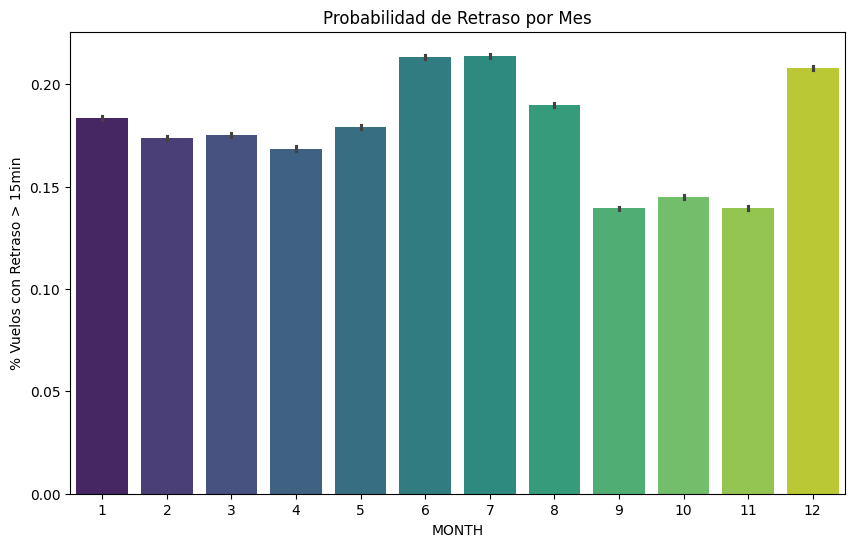

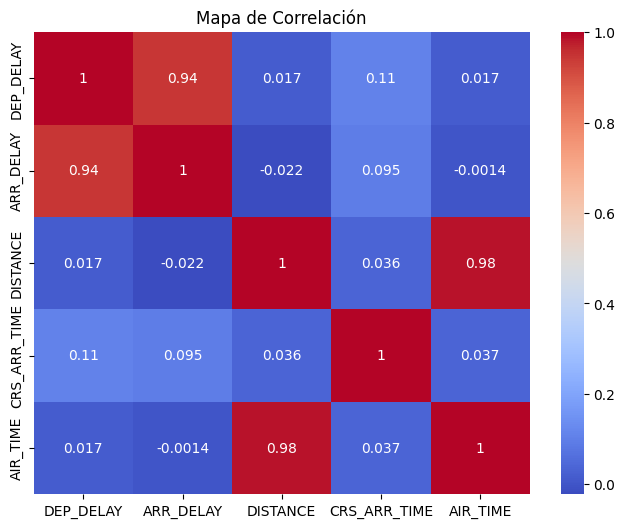

In [ ]:


plt.figure(figsize=(10,6))
sns.barplot(x='MONTH', y='IS_DELAYED', data=df_final_filt, palette='viridis')
plt.title('Probabilidad de Retraso por Mes')
plt.ylabel('% Vuelos con Retraso > 15min')
plt.show()


cols_interes = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'CRS_ARR_TIME', 'AIR_TIME']
plt.figure(figsize=(8,6))
sns.heatmap(df_final_filt[cols_interes].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()

In [ ]:

df_final_filt['DEP_HOUR'] = (df_final_filt['CRS_DEP_TIME'] // 100).astype(int)


df_final_filt['DISTANCE_GROUP'] = pd.cut(df_final_filt['DISTANCE'],
                                   bins=[0, 500, 1000, 1500, 2000, 2500, 5000],
                                   labels=['0-500', '500-1k', '1k-1.5k', '1.5k-2k', '2k-2.5k', '2.5k+'])


df_final_filt['IS_DELAYED'] = (df_final_filt['ARR_DELAY'] > 15).astype(int)

/tmp/ipython-input-3882623479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filt['DEP_HOUR'] = (df_final_filt['CRS_DEP_TIME'] // 100).astype(int)
/tmp/ipython-input-3882623479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filt['DISTANCE_GROUP'] = pd.cut(df_final_filt['DISTANCE'],
/tmp/ipython-input-3882623479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/tmp/ipython-input-3988767854.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AIRLINE_CODE', y='IS_DELAYED', data=df_final_filt, order=order_carrier, palette='magma')
/tmp/ipython-input-3988767854.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DISTANCE_GROUP', y='IS_DELAYED', data=df_final_filt, palette='viridis')


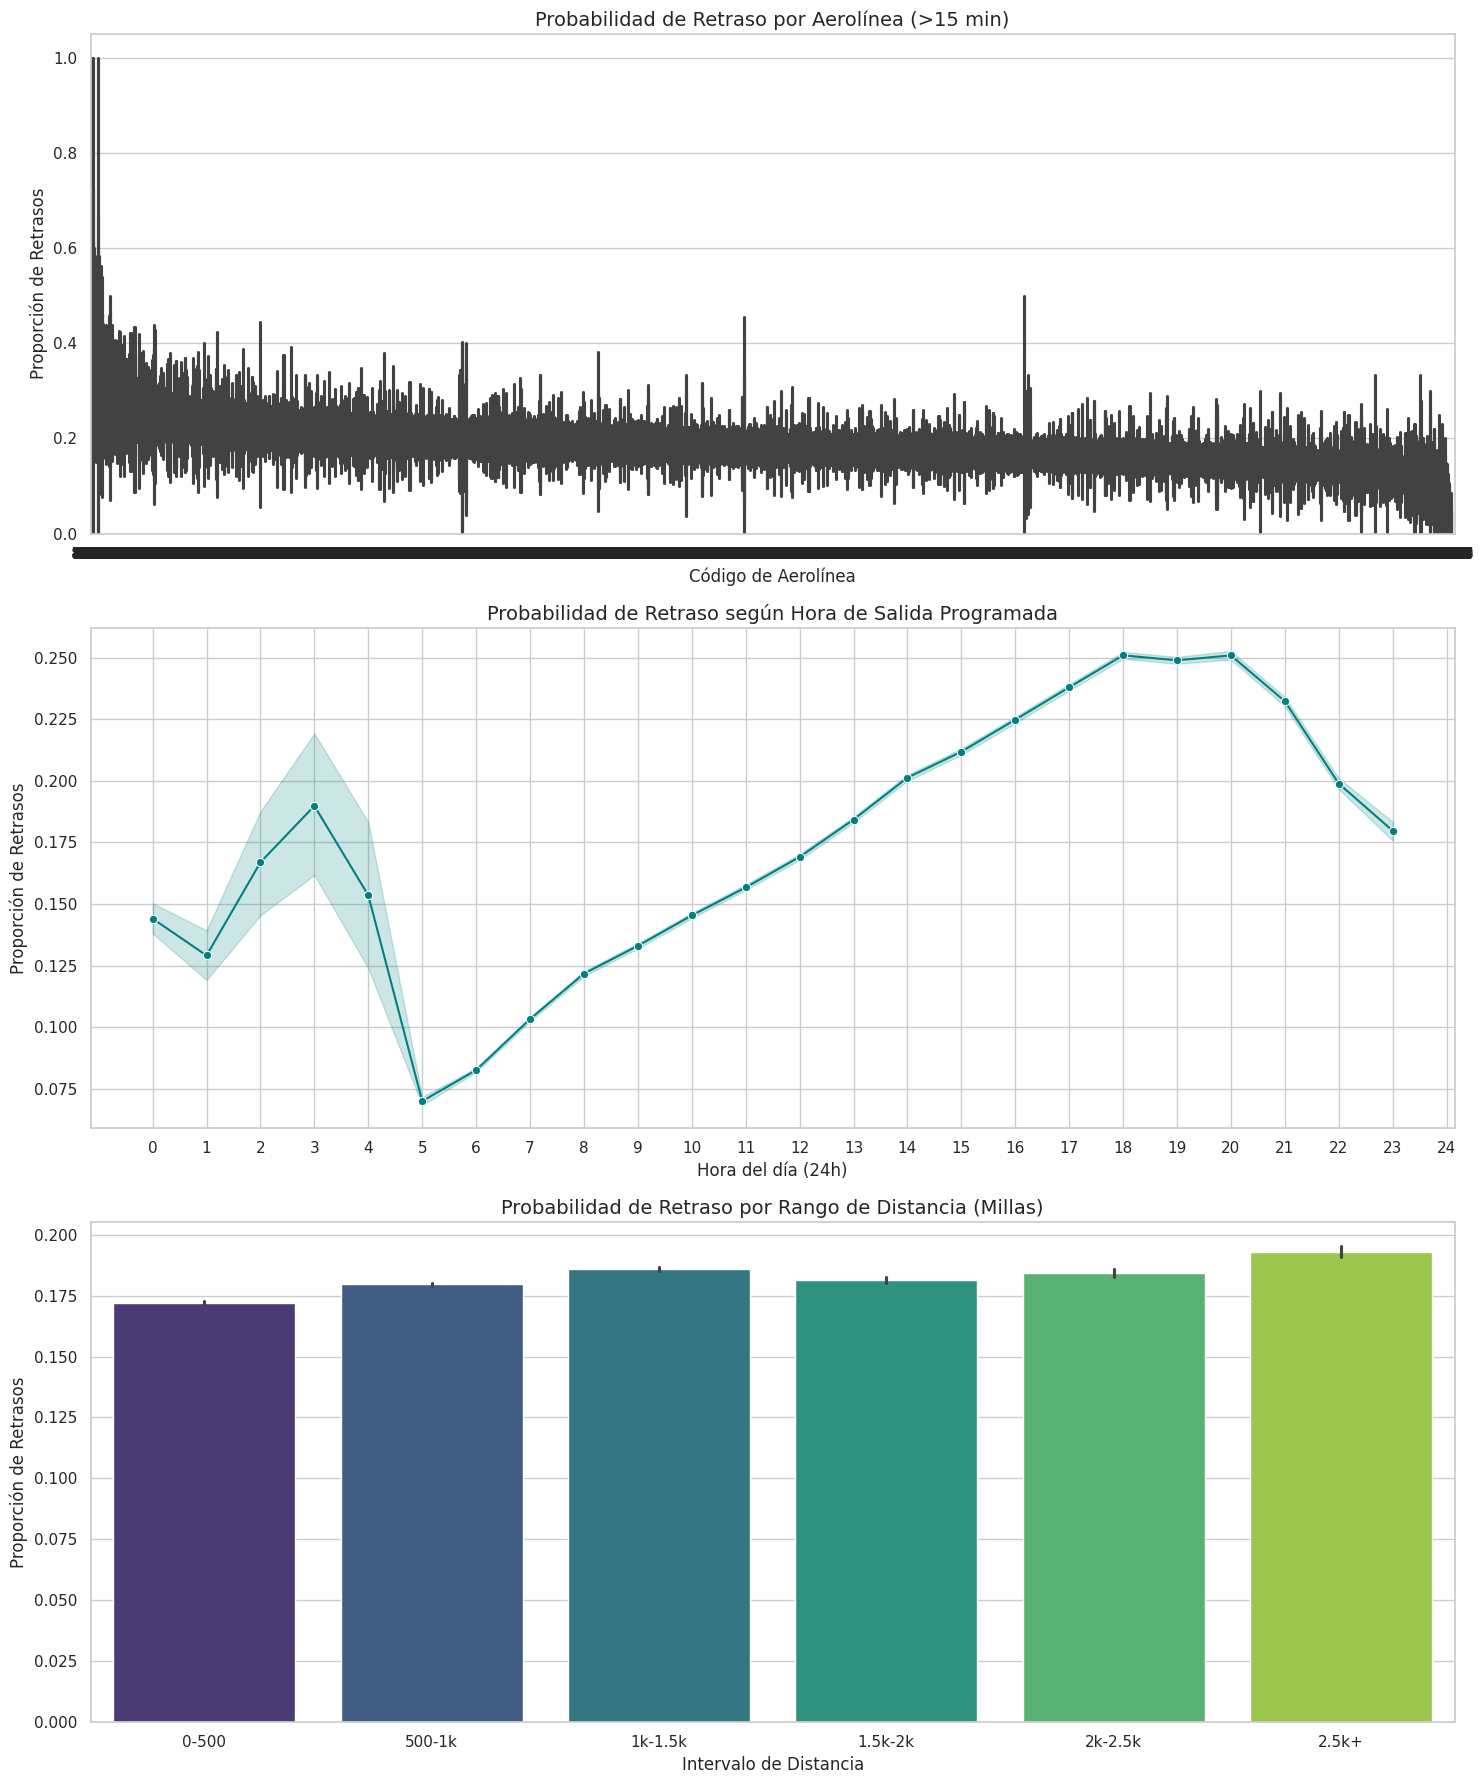

In [ ]:


sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 18))

#Retrasos por Aerolínea
plt.subplot(3, 1, 1)

order_carrier = df_final_filt.groupby('AIRLINE_CODE')['IS_DELAYED'].mean().sort_values(ascending=False).index
sns.barplot(x='AIRLINE_CODE', y='IS_DELAYED', data=df_final_filt, order=order_carrier, palette='magma')
plt.title('Probabilidad de Retraso por Aerolínea (>15 min)', fontsize=14)
plt.ylabel('Proporción de Retrasos')
plt.xlabel('Código de Aerolínea')

#Retrasos por Franja Horaria
plt.subplot(3, 1, 2)
sns.lineplot(x='DEP_HOUR', y='IS_DELAYED', data=df_final_filt, marker='o', color='teal')
plt.title('Probabilidad de Retraso según Hora de Salida Programada', fontsize=14)
plt.xticks(range(0, 25))
plt.ylabel('Proporción de Retrasos')
plt.xlabel('Hora del día (24h)')

# Retrasos por Intervalo de Distancias
plt.subplot(3, 1, 3)
sns.barplot(x='DISTANCE_GROUP', y='IS_DELAYED', data=df_final_filt, palette='viridis')
plt.title('Probabilidad de Retraso por Rango de Distancia (Millas)', fontsize=14)
plt.ylabel('Proporción de Retrasos')
plt.xlabel('Intervalo de Distancia')

plt.tight_layout()
plt.show()

In [ ]:

if 'DAY_OF_WEEK' not in df_final_filt.columns:
    df_final_filt['DAY_OF_WEEK'] = pd.to_datetime(df_final_filt['FL_DATE']).dt.dayofweek

dias_map = {0: 'Lun', 1: 'Mar', 2: 'Mie', 3: 'Jue', 4: 'Vie', 5: 'Sab', 6: 'Dom'}
df_final_filt['DAY_NAME'] = df_final_filt['DAY_OF_WEEK'].map(dias_map)

plt.figure(figsize=(10, 6))
order_dias = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']

sns.barplot(x='DAY_NAME', y='IS_DELAYED', data=df_final_filt,
            order=order_dias, palette='coolwarm', ci=None)

promedio_general = df_final_filt['IS_DELAYED'].mean()
plt.axhline(promedio_general, color='red', linestyle='--', label=f'Promedio: {promedio_general:.2%}')

plt.title('Probabilidad de Retraso por Día de la Semana', fontsize=15)
plt.ylabel('Proporción de Vuelos Retrasados (>15 min)')
plt.xlabel('Día de la Semana')
plt.legend()
plt.show()

/tmp/ipython-input-3823567458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filt['DAY_NAME'] = df_final_filt['DAY_OF_WEEK'].map(dias_map)
/tmp/ipython-input-3823567458.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DAY_NAME', y='IS_DELAYED', data=df_final_filt,
/tmp/ipython-input-3823567458.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_NAME', y='IS_DELAYED', data=df_final_filt,


In [ ]:

df_final_filt['ROUTE'] = df_final_filt['ORIGIN'].astype(str) + ' -> ' + df_final_filt['DEST'].astype(str)

df_final_filt['IS_DELAYED'] = (df_final_filt['ARR_DELAY'] > 15).astype(int)

route_counts = df_final_filt['ROUTE'].value_counts()
top_routes = route_counts[route_counts > 100].index

df_routes = df_final_filt[df_final_filt['ROUTE'].isin(top_routes)]
route_delay_stats = df_routes.groupby('ROUTE')['IS_DELAYED'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=route_delay_stats.values, y=route_delay_stats.index, palette='Reds_r')

plt.title('Top 20 Rutas con Mayor Probabilidad de Retraso (>15 min)', fontsize=15)
plt.xlabel('Proporción de Vuelos Retrasados')
plt.ylabel('Ruta (Origen -> Destino)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2704376934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filt['DEP_HOUR'] = df_final_filt['CRS_DEP_TIME'] // 100


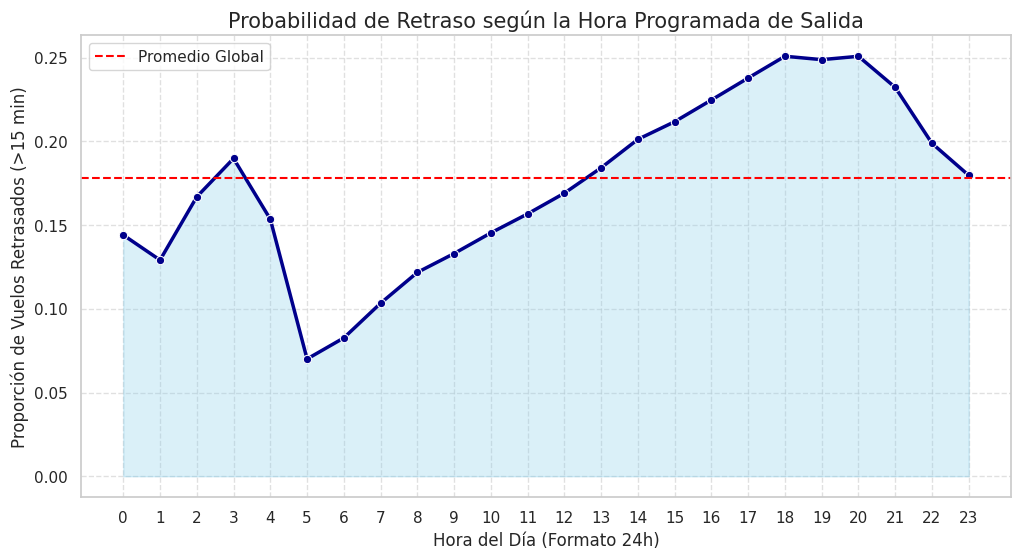

In [ ]:

df_final_filt['DEP_HOUR'] = df_final_filt['CRS_DEP_TIME'] // 100


df_final_filt = df_final_filt[(df_final_filt['DEP_HOUR'] >= 0) & (df_final_filt['DEP_HOUR'] <= 23)]


hora_stats = df_final_filt.groupby('DEP_HOUR')['IS_DELAYED'].mean()


plt.figure(figsize=(12, 6))
sns.lineplot(x=hora_stats.index, y=hora_stats.values, marker='o', color='darkblue', linewidth=2.5)
plt.fill_between(hora_stats.index, hora_stats.values, color='skyblue', alpha=0.3)

plt.title('Probabilidad de Retraso según la Hora Programada de Salida', fontsize=15)
plt.xlabel('Hora del Día (Formato 24h)', fontsize=12)
plt.ylabel('Proporción de Vuelos Retrasados (>15 min)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)


plt.axhline(df_final_filt['IS_DELAYED'].mean(), color='red', linestyle='--', label='Promedio Global')
plt.legend()

plt.show()

In [ ]:
df_final_filt["IS_DELAYED"].value_counts()

,count
IS_DELAYED,
0,5059780
1,1095917


In [ ]:
5059780/(5059780+1095917)

0.8219670331401951

In [ ]:

df_final_filt['FL_DATE'] = pd.to_datetime(df_final_filt['FL_DATE'])
df_final_filt['YEAR'] = df_final_filt['FL_DATE'].dt.year

tabla_anual = df_final_filt.groupby('YEAR')['IS_DELAYED'].agg(['count', 'sum', 'mean'])

tabla_anual.columns = ['Total_Vuelos', 'Vuelos_Retrasados', 'Tasa_Retraso_%']


tabla_anual['Tasa_Retraso_%'] = (tabla_anual['Tasa_Retraso_%'] * 100).round(2).astype(str) + '%'

print("Resumen de Retrasos por Año:")
display(tabla_anual)

Resumen de Retrasos por Año:


,Total_Vuelos,Vuelos_Retrasados,Tasa_Retraso_%
YEAR,,,
2009,642934,112072,17.43%
2010,645012,112820,17.49%
2011,606665,106323,17.53%
2012,609676,97552,16.0%
2013,636948,122116,19.17%
2014,581981,119031,20.45%
2015,581908,102838,17.67%
2016,561766,92974,16.55%
2017,567462,99392,17.52%
